In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import _tconfint_generic

In [60]:
sf_data = pd.read_csv('scaling_factor.txt', '\t')

In [61]:
sf_data.head()

,structure,description,func_group,experimental,theoretical,sf,method,basis_set,comments
0,benzene,61+34 CC(4-5)+HCC(11-5-6),carbon,1037.52,1061,0.9779,DFT B3LYP,6-31+G**,NaN
1,benzene,65+29 HCC(11-5-6)+CC(4-5),carbon,1483.00,1515,0.9789,DFT B3LYP,6-31+G**,NaN
2,cyclohexane,NaN,hydrogen,2852.00,3010,0.9475,DFT B3LYP,6-31+G**,nist all
3,benzoic_acid,83+5+4 OC(13-12)+HOC(15-14-12)+CC(12-3),carboxyl,1764.00,1790,0.9855,DFT B3LYP,6-31+G**,NaN
4,benzoic_acid,26+14 CC(2-1)+CC(5-4),carbon/hydrogen,1599.00,1650,0.9691,DFT B3LYP,6-31+G**,NaN


In [62]:
sf_data = sf_data[sf_data.sf < 1]
sf_data = sf_data[sf_data.sf > 0.9]

In [63]:
sf_data.structure.unique()

array(['benzene', 'cyclohexane', 'benzoic_acid', 'beta-propiolactone',
       'cyclohexanone', 'acetic_acid', 'ethylene', 'propane',
       'isobutanol'], dtype=object)

In [64]:
sf_data.func_group.replace('carbon/hydrogen', 'carbon', inplace=True)

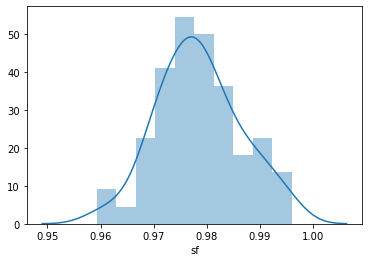

In [65]:
sns.distplot(sf_data.sf[sf_data.func_group == 'carbon'], bins=10)

# По диапазонам

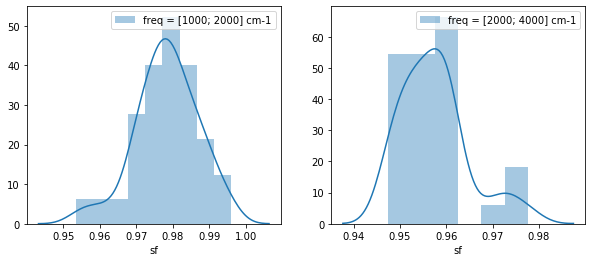

In [73]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.distplot(sf_data[sf_data.theoretical < 2000].sf, label='freq = [1000; 2000] cm-1')
plt.legend()

plt.subplot(1, 2, 2)
sns.distplot(sf_data[sf_data.theoretical > 2000].sf, label='freq = [2000; 4000] cm-1')

plt.legend()

In [74]:
sf_mean = sf_data[sf_data.theoretical < 2000].sf.mean()
sf_std =  sf_data[sf_data.theoretical < 2000].sf.std()
ci = _tconfint_generic(sf_mean, sf_std, len(sf_data[sf_data.theoretical < 2000]) - 1, 0.05, 'two-sided')
print("Среднее значение sf для диапазона [1000; 2000] cm-1:", sf_mean)
print("Доверительный интервал для sf для диапазона [1000; 2000] cm-1:", ci)
print("Ширина доверительного интервала:", ci[1] - ci[0])
print("Максимальная возможная ошибка:", (ci[1] - ci[0]) * 1800 / 2)

Среднее значение sf для диапазона [1000; 2000] cm-1: 0.978350724637681
Доверительный интервал для sf для диапазона [1000; 2000] cm-1: (0.9611553097856111, 0.9955461394897509)
Ширина доверительного интервала: 0.03439082970413976
Максимальная возможная ошибка: 30.951746733725784


In [76]:
sf_mean = sf_data[sf_data.theoretical > 2000].sf.mean()
sf_std =  sf_data[sf_data.theoretical > 2000].sf.std()
ci = _tconfint_generic(sf_mean, sf_std, len(sf_data[sf_data.theoretical > 2000]) - 1, 0.05, 'two-sided')
print("Среднее значение sf для диапазона [2000; 4000] cm-1:", sf_mean)
print("95% доверительный интервал для sf для диапазона [2000; 4000] cm-1:", ci)
print("Ширина доверительного интервала:", ci[1] - ci[0])
print("Максимальная возможная ошибка:", (ci[1] - ci[0]) * 3800 / 2)

Среднее значение sf для диапазона [2000; 4000] cm-1: 0.9573999999999999
95% доверительный интервал для sf для диапазона [2000; 4000] cm-1: (0.9425150477461176, 0.9722849522538822)
Ширина доверительного интервала: 0.029769904507764622
Максимальная возможная ошибка: 56.56281856475278


# По функциональным группам и диапазонам

In [69]:
carbon = sf_data.loc[sf_data.func_group == 'carbon']

In [70]:
carbon

,structure,description,func_group,experimental,theoretical,sf,method,basis_set,comments
0,benzene,61+34 CC(4-5)+HCC(11-5-6),carbon,1037.52,1061,0.9779,DFT B3LYP,6-31+G**,NaN
1,benzene,65+29 HCC(11-5-6)+CC(4-5),carbon,1483.00,1515,0.9789,DFT B3LYP,6-31+G**,NaN
4,benzoic_acid,26+14 CC(2-1)+CC(5-4),carbon,1599.00,1650,0.9691,DFT B3LYP,6-31+G**,NaN
5,benzoic_acid,30+14+12 HCC(11-6-1)+HCC(7-1-2)+HCC(10-5-6)+,carbon,1457.00,1485,0.9811,DFT B3LYP,6-31+G**,NaN
7,benzoic_acid,41+11+9 HOC(15-14-12)+CC(12-3)+HCC(8-2-3),carbon,1184.00,1192,0.9933,DFT B3LYP,6-31+G**,???
9,benzoic_acid,22+14+14+14 CCC(2-1-6)+CC(1-6)+CC(6-5)+CCC(6-5-4),carbon,1025.00,1047,0.9790,DFT B3LYP,6-31+G**,NaN
16,cyclohexanone,NaN,carbon,1449.00,1493,0.9705,DFT B3LYP,6-31+G**,NaN
17,cyclohexanone,NaN,carbon,1427.00,1473,0.9688,DFT B3LYP,6-31+G**,NaN
18,cyclohexanone,NaN,carbon,1340.00,1374,0.9753,DFT B3LYP,6-31+G**,NaN
19,cyclohexanone,NaN,carbon,1308.00,1340,0.9761,DFT B3LYP,6-31+G**,NaN


In [23]:
carbon_sf_mean = carbon.sf.mean()
carbon_sf_mean

0.9797784615384617

In [24]:
carbon_sf_std =  carbon.sf.std()

In [25]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [26]:
_tconfint_generic(carbon_sf_mean, carbon_sf_std, len( carbon.sf) - 1, 0.05, 'two-sided')

(0.9394040614777417, 1.0201528615991817)

In [27]:
(0.9377 -  0.9898) * 1000

-52.10000000000004

In [29]:
carboxyl = sf_data.loc[sf_data.func_group == 'carboxyl']

In [30]:
carboxyl_3000 = carboxyl[carboxyl.experimental > 3000]

In [31]:
carboxyl_3000_sf_mean = carboxyl_3000.sf.mean()
carboxyl_3000_sf_mean

nan

In [32]:
carboxyl_3000_sf_std =  carboxyl_3000.sf.std()

In [33]:
_tconfint_generic(carboxyl_3000_sf_mean, carboxyl_3000_sf_std, len(carboxyl_3000.sf) - 1, 0.05, 'two-sided')

(nan, nan)

In [34]:
tmp = carboxyl[carboxyl.experimental > 1600]
carboxyl_1700 = tmp[tmp.experimental < 3000]
carboxyl_1700

,structure,description,func_group,experimental,theoretical,sf,method,basis_set,comments
3,benzoic_acid,83+5+4 OC(13-12)+HOC(15-14-12)+CC(12-3),carboxyl,1764.0,1790,0.9855,DFT B3LYP,6-31+G**,NaN
26,acetic_acid,NaN,carboxyl,1790.0,1822,0.9824,DFT B3LYP,6-31+G**,NaN


In [35]:
carboxyl_1700_sf_mean = carboxyl_1700.sf.mean()
carboxyl_1700_sf_mean

0.9839500000000001

In [36]:
carboxyl_1700_sf_std =  carboxyl_1700.sf.std()

In [37]:
_tconfint_generic(carboxyl_1700_sf_mean, carboxyl_1700_sf_std, len(carboxyl_1700.sf) - 1, 0.05, 'two-sided')

(0.9560976050499453, 1.011802394950055)